In [99]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()

In [100]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [101]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [102]:
import pandas as pd
df=pd.DataFrame(dataset['data'], columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [103]:
X=df
y=dataset['target']

In [104]:
from sklearn .model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [105]:
X_train.shape

(309, 10)

In [106]:
y_train.shape

(309,)

In [107]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

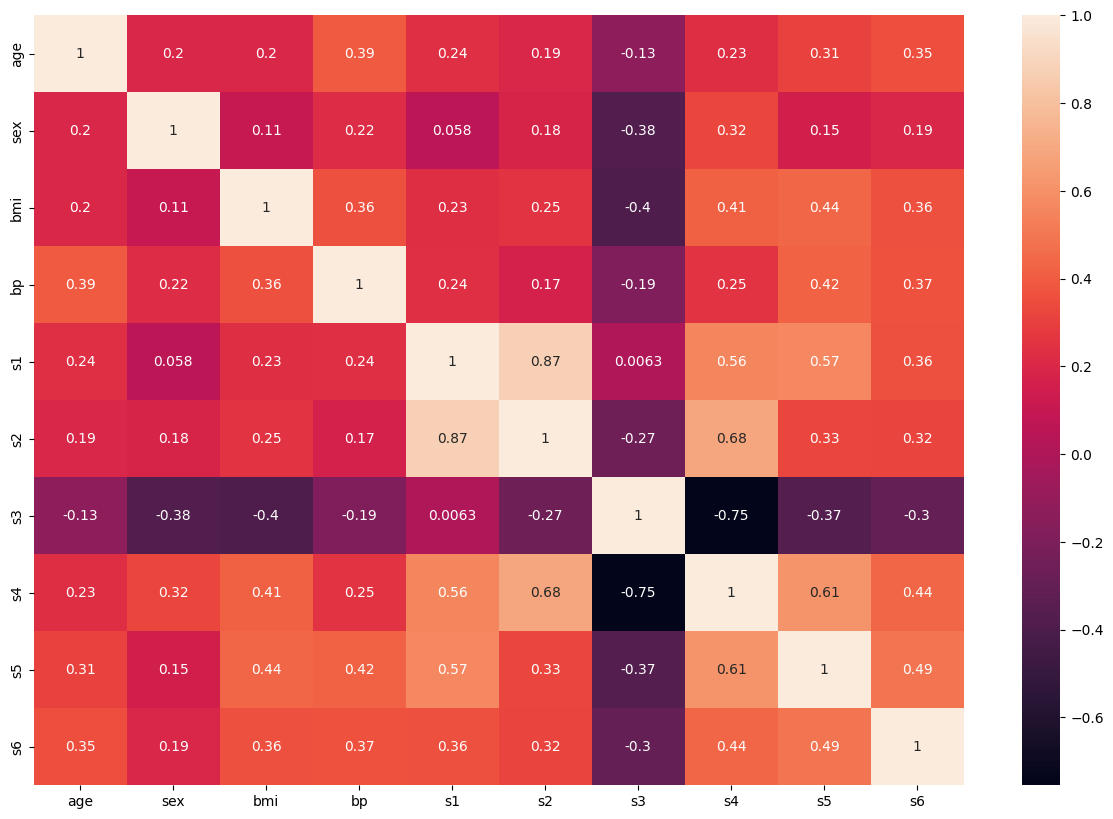

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import heatmap

plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True)

In [109]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [110]:
param={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[2,3,4,5,7,10,15,20,25],
    'max_features':['auto', 'sqrt', 'log2'],
}

In [111]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=regressor, param_grid=param, cv=5, scoring='neg_mean_squared_error')

In [112]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [2, 3, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'poisson'


In [113]:
y_pred=grid.predict(X_test)

In [114]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [115]:
print("R2 score:", r2_score(y_test, y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))  
print("Mean squared error:", mean_squared_error(y_test, y_pred))

R2 score: 0.2655279518942365
Mean absolute error: 55.136154179444475
Mean squared error: 4647.4975489069175


In [116]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [117]:
selectedmodel=DecisionTreeRegressor(criterion='absolute_error', max_depth=4, max_features='sqrt', splitter='random')

In [118]:
selectedmodel.fit(X_train, y_train)

,criterion,'absolute_error'
,splitter,'random'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.5, 0.9, 'x[3] <= 0.013\nabsolute_error = 63.683\nsamples = 309\nvalue = 140.0'),
 Text(0.25, 0.7, 'x[7] <= 0.059\nabsolute_error = 53.153\nsamples = 196\nvalue = 114.0'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[3] <= 0.002\nabsolute_error = 49.782\nsamples = 174\nvalue = 109.0'),
 Text(0.0625, 0.3, 'x[2] <= -0.028\nabsolute_error = 47.212\nsamples = 156\nvalue = 103.5'),
 Text(0.03125, 0.1, 'absolute_error = 31.792\nsamples = 72\nvalue = 88.0'),
 Text(0.09375, 0.1, 'absolute_error = 55.405\nsamples = 84\nvalue = 131.5'),
 Text(0.1875, 0.3, 'x[8] <= 0.004\nabsolute_error = 52.833\nsamples = 18\nvalue = 174.5'),
 Text(0.15625, 0.1, 'absolute_error = 54.222\nsamples = 9\nvalue = 177.0'),
 Text(0.21875, 0.1, 'absolute_error = 50.889\nsamples = 9\nvalue = 172.0'),
 Text(0.375, 0.5, 'x[8] <= 0.065\nabsolute_error = 65.364\nsamples = 22\nvalue = 171.0'),
 Text(0.3125, 0.3, 'x[4] <= 0.029\nabsolute_error = 50.733\nsamples = 15\nvalue = 131.0'),
 Text(0.28125, 0.1, 'absolute_e

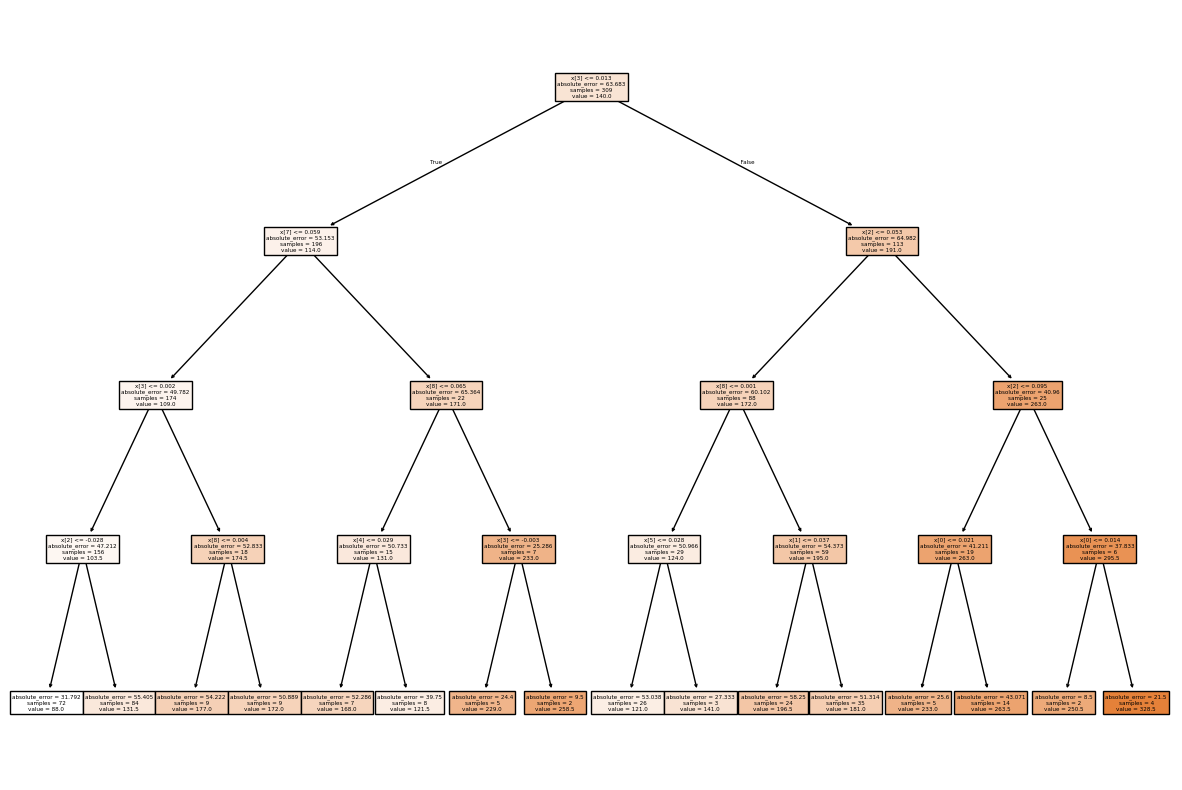

In [119]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel, filled=True)